/home/davidstewart/penv-ML/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/davidstewart/penv-ML/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Index(['matched_IPtoT', 'matched_TtoR', 'dR_IPtoT', 'dR_TtoR', 'IP_pt',
       'IP_eta', 'IP_phi', 'resid_rhoA', 'Xsec', 'XsecSigma',
       'rho_bkg_thermal', 'rho_bkg_thermalandjet', 'truth_pt', 'truth_phi',
       'truth_eta', 'truth_isleadjet', 'truth_charge', 'truth_nconsts',
       'truth_C0_pt', 'truth_C1_pt', 'truth_C2_pt', 'truth_C3_pt',
       'truth_C4_pt', 'truth_C5_pt', 'truth_C6_pt', 'truth_C7_pt',
       'truth_C8_pt', 'truth_C9_pt', 'reco_pt', 'reco_phi', 'reco_eta',
       'reco_isleadjet', 'reco_area', 'reco_charge', 'reco_nconsts',
       'reco_angularity', 'reco_C0_pt', 'reco_C1_pt', 'reco_C2_pt',
       'reco_C3_pt', 'reco_C4_pt', 'reco_C5_pt', 'reco_C6_pt', 'reco_C7_pt',
       'reco_C8_pt', 'reco_C9_pt'],
      dtype='object')
INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPUs will likely run quickly with dtype policy mixed_float16 as they all have compute capability of at least 7.0
INFO:tensorflow:Using MirroredStrategy with device

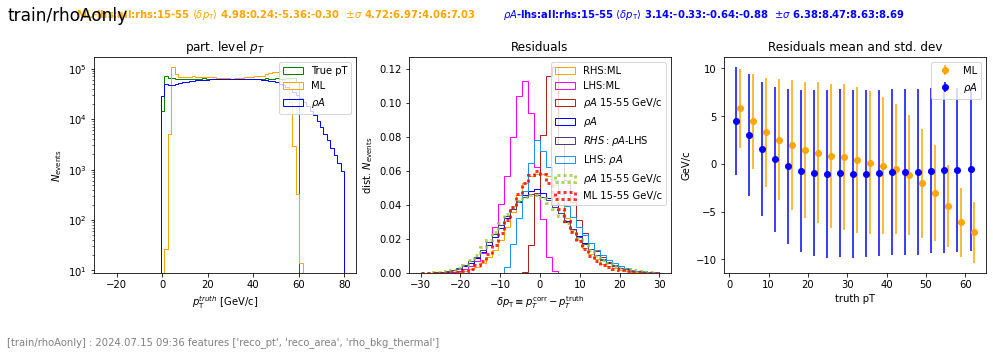

mean: 0.23617160320281982


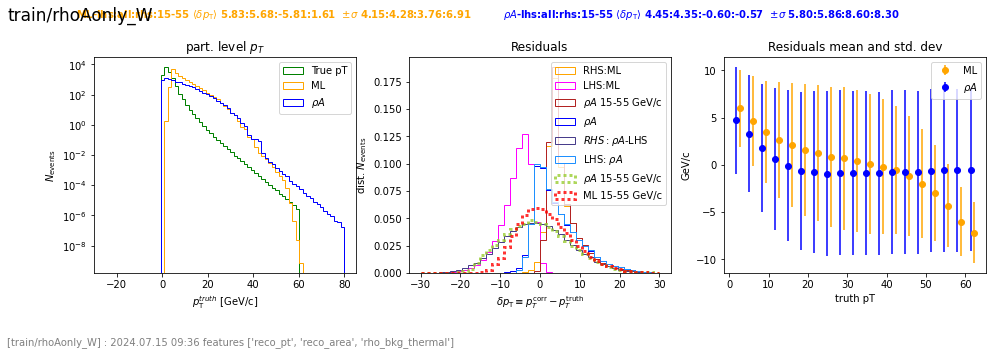

In [1]:
# import the data itself
import TrainNN

import pandas as pd
import os
# import numpy as np
# import seaborn as sns
# import pyarrow
# import matplotlib.pyplot as plt
# import os
# import pickle
# from plot_res_err import plot_res_err
# from datetime import datetime

'''
# What is needed:
   Input: 
     tag which matches name of running file (up to the first underscore '_'): A0, A1, etc...
     name of input *.parquet file
   Output:
     make output director
     hard link the input parquet file into that directory
     save output images to that directory
     save output pickled trained models to that directory
'''
x_keys = ['reco_pt','reco_area','rho_bkg_thermal']
FRACTION=1.
odir = 'train/rhoAonly'

SEED = 1
in_parquet_name = '../NoBrickInput/min_bias_input.parquet'

try: 
   df  = pd.read_parquet(in_parquet_name)
except:
   exit(f'fatal error: failed to read {in_parquet_name}')

df = df.sample(frac=FRACTION, random_state=SEED)
print(df.columns)

# Train with only ML level data

mini_NN = False
TrainNN.TrainNN(df, f'{odir}', x_keys=x_keys, mini_NN=mini_NN, test_size=0.20, epochs=12)
# if False:
   # TrainNN.TrainNN(df, odir, x_keys=x_keys, y_key=y_key, mini_NN=False, test_size=0.)

#Train with angularity
# odir = f'Trained_NN_{y_key}/reco_angularity'
# x_keys = ['reco_pt','reco_area','rho_bkg_est', 'reco_angularity']
# TrainNN.TrainNN(df, f'{odir}_verify', x_keys=x_keys, y_key=y_key, mini_NN=False, test_size=0.25)
# TrainNN.TrainNN(df, odir, x_keys=x_keys, y_key=y_key, mini_NN=False, test_size=0.)

# #Train with all reco data
# x_keys = [x for x in df.columns if x.startswith('reco_C')]
# x_keys.extend(['reco_pt', 'reco_nconsts', 'reco_angularity','reco_area','rho_bkg_est'])
# odir = f'Trained_NN_{y_key}/allreco'
# TrainNN.TrainNN(df, f'{odir}_verify', x_keys=x_keys, y_key=y_key, mini_NN=False, test_size=0.25)
# TrainNN.TrainNN(df, odir, x_keys=x_keys, y_key=y_key, mini_NN=False, test_size=0.)